In [296]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [297]:
data= pd.read_csv("regLogRegData.txt",header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


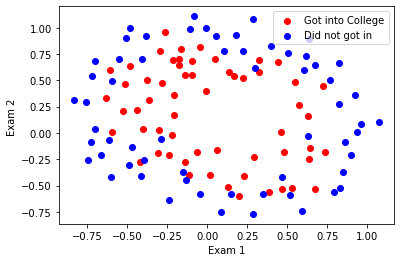

In [298]:
m=len(data[0])
data_arr= data.values
X=data_arr[:,0:2] 
y= data_arr[:,2] 
pos=(y==1).reshape(m,1)
neg=(y==0).reshape(m,1)

plt.scatter(X[pos[:,0],0] , X[pos[:,0],1], c='r')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c='b')

plt.xlabel('Exam 1')
plt.ylabel("Exam 2 ")

plt.legend(["Got into College","Did not got in "])

In [299]:
 
def PolyFeatureMapping(x1,x2,degree):

    arr = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            arr= np.hstack((arr,terms))                      #horizontalStacker
    return arr


X = PolyFeatureMapping(X[:,0], X[:,1],6)


In [300]:
def sigmoid(z):
    return  1/(1+np.exp(-z))
    
    
    

In [301]:
 
def CostFunction(X,y, theta,Lambda):
    m= len(y)
    h = sigmoid(X @ theta) 
    y=y[:,np.newaxis]
    cost =  (1/m)*  sum((-y*np.log(h)) - ((1-y)*np.log(1-h))) 
    reg_cost=cost + (Lambda/2*m) *  sum(theta**2)
    grad_0 = 1/m * (X.transpose().dot(h-y))[0] 
    grad_1 = 1/m *  (X.transpose().dot(h-y))[1:]+(Lambda/m)*theta[1:]
    grad = np.vstack((grad_0[:,np.newaxis],grad_1))
     
    return cost[0], grad 

In [305]:
 
theta = np.zeros((X.shape[1], 1))

Lambda = 1

cost, grad=CostFunction( X, y,theta, Lambda)

print(cost)

0.6931471805599461


In [312]:

def GradientDescent(X,y, theta,learningRate, iterations,Lambda):
    cost_history=[]
    for i in range(iterations):
            cost,grad= CostFunction(X,y,theta,Lambda)
            theta= theta-(learningRate*grad)
            cost_history.append(cost)
    return theta ,cost_history    

In [314]:
opt_theta,Cost_history=GradientDescent(X, y, theta ,1,800,0.2)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

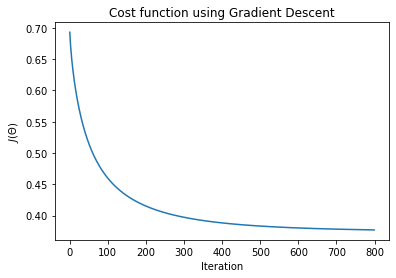

In [315]:
plt.plot(Cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

<ipython-input-316-0d10b8c0f452>:17: UserWarning: No contour levels were found within the data range.
  plt.contour(u_vals,v_vals,z.T,0)


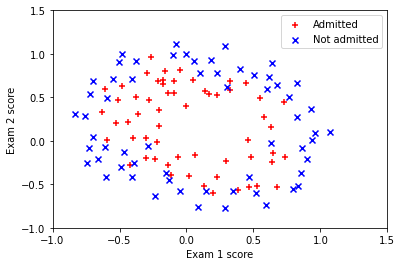

In [316]:
def mapFeaturePlot(x1,x2,degree):
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [318]:
def Predict(X,theta):
    prediction= X.dot(theta)
    return prediction>0

In [322]:
p= Predict(X,opt_theta)
print("Accuracy :",(sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Accuracy : 83.05084745762711 %
